### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación




--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 1 ---
Total de Facturación Neta: $1089502500.00
Promedio de Facturación Neta: $461849.30
Facturación Neta Máxima: $2818300.00
Facturación Neta Mínima: $2000.00


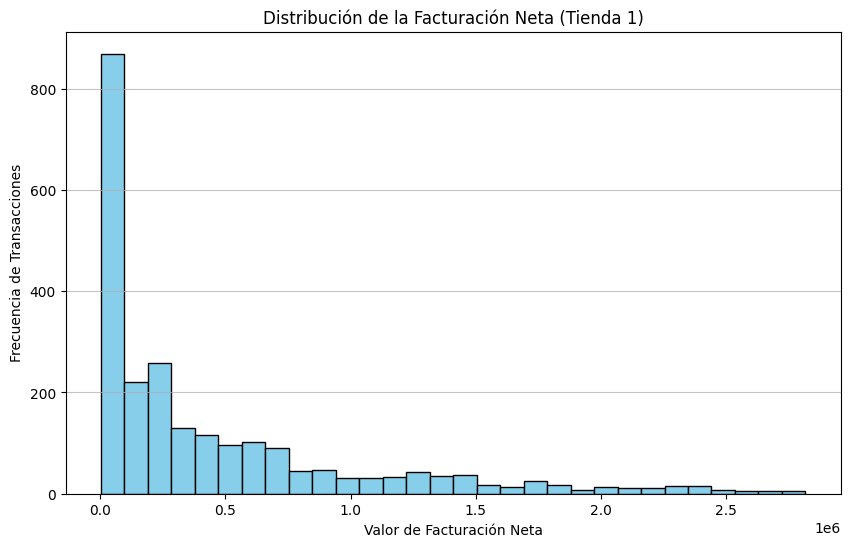

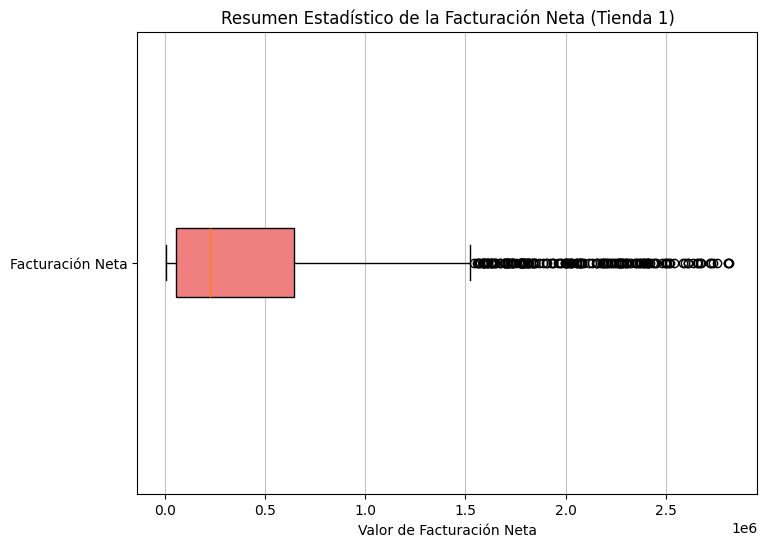

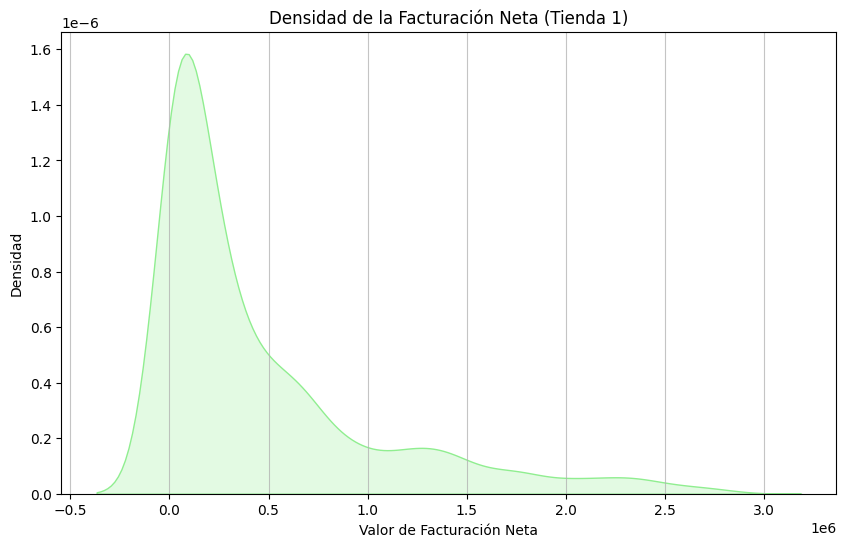

In [ ]:
import urllib.request
import csv
import io
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_1 = crear_lista_desde_csv(url)

if datos_tienda_1:
    facturacion_neta = []
    for fila in datos_tienda_1[1:]: # Omitimos la primera fila (encabezados)
        if len(fila) > 3: # Aseguramos que la fila tenga al menos 4 elementos
            try:
                monto_facturado = float(fila[2].strip())
                costo_envio = float(fila[3].strip())
                factura_neta = monto_facturado - costo_envio
                facturacion_neta.append(factura_neta)
            except ValueError as e:
                print(f"Advertencia: Error al convertir valores en la fila '{fila}'. Se omitirá en el análisis. Error: {e}")
            except IndexError:
                print(f"Advertencia: Fila '{fila}' no tiene suficientes elementos. Se omitirá.")

    if facturacion_neta:
        total_facturacion_neta = sum(facturacion_neta)
        promedio_facturacion_neta = total_facturacion_neta / len(facturacion_neta)
        maxima_facturacion_neta = max(facturacion_neta)
        minima_facturacion_neta = min(facturacion_neta)

        print("\n--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 1 ---")
        print(f"Total de Facturación Neta: ${total_facturacion_neta:.2f}")
        print(f"Promedio de Facturación Neta: ${promedio_facturacion_neta:.2f}")
        print(f"Facturación Neta Máxima: ${maxima_facturacion_neta:.2f}")
        print(f"Facturación Neta Mínima: ${minima_facturacion_neta:.2f}")

        # 1. Histograma de la Distribución de la Facturación Neta
        plt.figure(figsize=(10, 6))
        plt.hist(facturacion_neta, bins=30, color='skyblue', edgecolor='black')
        plt.title('Distribución de la Facturación Neta (Tienda 1)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Frecuencia de Transacciones')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # 2. Gráfico de Caja (Box Plot) para Resumen Estadístico
        plt.figure(figsize=(8, 6))
        plt.boxplot(facturacion_neta, vert=False, patch_artist=True, boxprops={'facecolor': 'lightcoral'})
        plt.title('Resumen Estadístico de la Facturación Neta (Tienda 1)')
        plt.xlabel('Valor de Facturación Neta')
        plt.yticks([1], ['Facturación Neta'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

        # 3. Gráfico de Densidad (KDE) para una Visión Suavizada de la Distribución
        import seaborn as sns
        plt.figure(figsize=(10, 6))
        sns.kdeplot(facturacion_neta, fill=True, color='lightgreen')
        plt.title('Densidad de la Facturación Neta (Tienda 1)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Densidad')
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron valores de facturación y/o costos de envío válidos para analizar.")
else:
    print("No se pudieron obtener los datos del archivo CSV.")


--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 2 ---
Total de Facturación Neta: $1056858400.00
Promedio de Facturación Neta: $448011.19
Facturación Neta Máxima: $2798000.00
Facturación Neta Mínima: $2200.00


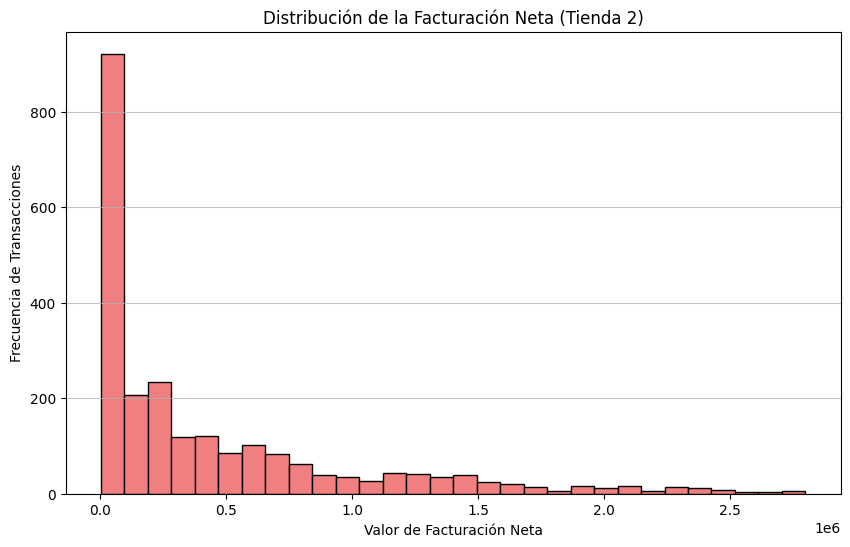

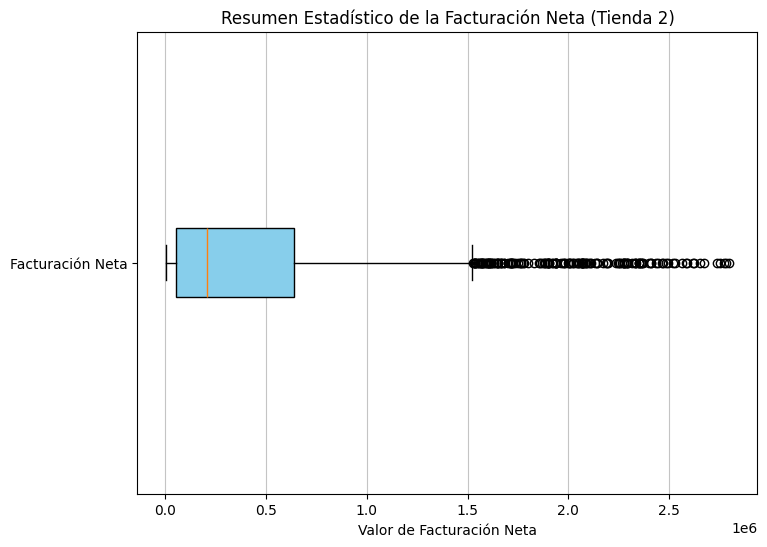

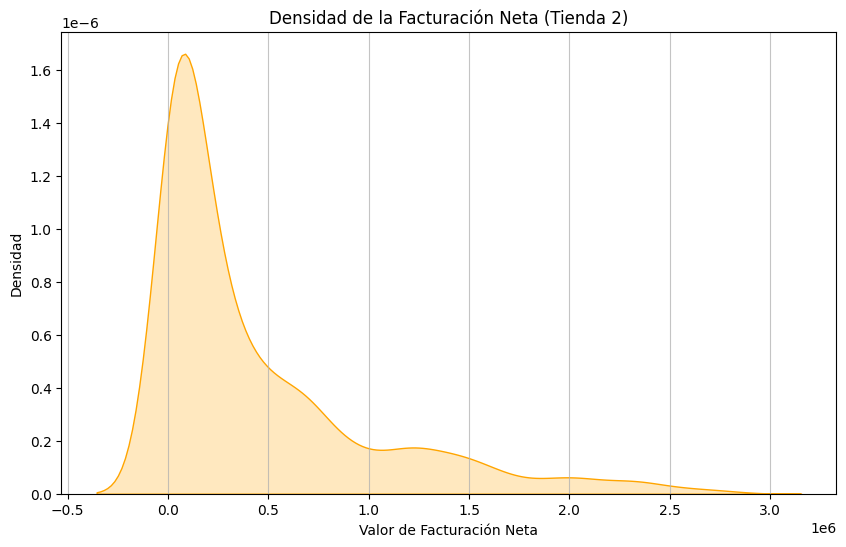

In [ ]:
import urllib.request
import csv
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_2 = crear_lista_desde_csv(url)

if datos_tienda_2:
    facturacion_neta = []
    for fila in datos_tienda_2[1:]: # Omitimos la primera fila (encabezados)
        if len(fila) > 3: # Aseguramos que la fila tenga al menos 4 elementos
            try:
                monto_facturado = float(fila[2].strip())
                costo_envio = float(fila[3].strip())
                factura_neta = monto_facturado - costo_envio
                facturacion_neta.append(factura_neta)
            except ValueError as e:
                print(f"Advertencia: Error al convertir valores en la fila '{fila}'. Se omitirá en el análisis. Error: {e}")
            except IndexError:
                print(f"Advertencia: Fila '{fila}' no tiene suficientes elementos. Se omitirá.")

    if facturacion_neta:
        total_facturacion_neta = sum(facturacion_neta)
        promedio_facturacion_neta = total_facturacion_neta / len(facturacion_neta)
        maxima_facturacion_neta = max(facturacion_neta)
        minima_facturacion_neta = min(facturacion_neta)

        print("\n--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 2 ---")
        print(f"Total de Facturación Neta: ${total_facturacion_neta:.2f}")
        print(f"Promedio de Facturación Neta: ${promedio_facturacion_neta:.2f}")
        print(f"Facturación Neta Máxima: ${maxima_facturacion_neta:.2f}")
        print(f"Facturación Neta Mínima: ${minima_facturacion_neta:.2f}")

        # 1. Histograma de la Distribución de la Facturación Neta
        plt.figure(figsize=(10, 6))
        plt.hist(facturacion_neta, bins=30, color='lightcoral', edgecolor='black')
        plt.title('Distribución de la Facturación Neta (Tienda 2)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Frecuencia de Transacciones')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # 2. Gráfico de Caja (Box Plot) para Resumen Estadístico
        plt.figure(figsize=(8, 6))
        plt.boxplot(facturacion_neta, vert=False, patch_artist=True, boxprops={'facecolor': 'skyblue'})
        plt.title('Resumen Estadístico de la Facturación Neta (Tienda 2)')
        plt.xlabel('Valor de Facturación Neta')
        plt.yticks([1], ['Facturación Neta'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

        # 3. Gráfico de Densidad (KDE) para una Visión Suavizada de la Distribución
        plt.figure(figsize=(10, 6))
        sns.kdeplot(facturacion_neta, fill=True, color='orange')
        plt.title('Densidad de la Facturación Neta (Tienda 2)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Densidad')
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron valores de facturación y/o costos de envío válidos para analizar en la Tienda 2.")
else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 2.")


--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 3 ---
Total de Facturación Neta: $1039503000.00
Promedio de Facturación Neta: $440654.09
Facturación Neta Máxima: $2809800.00
Facturación Neta Mínima: $6800.00


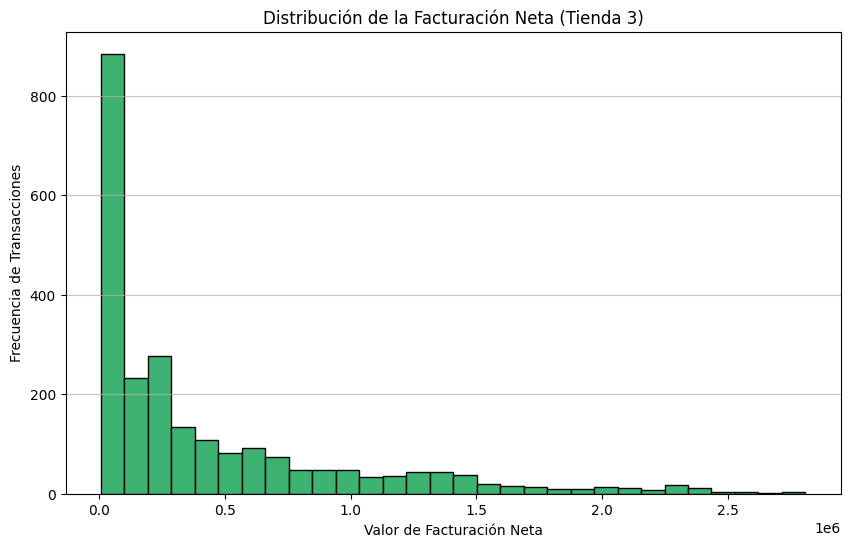

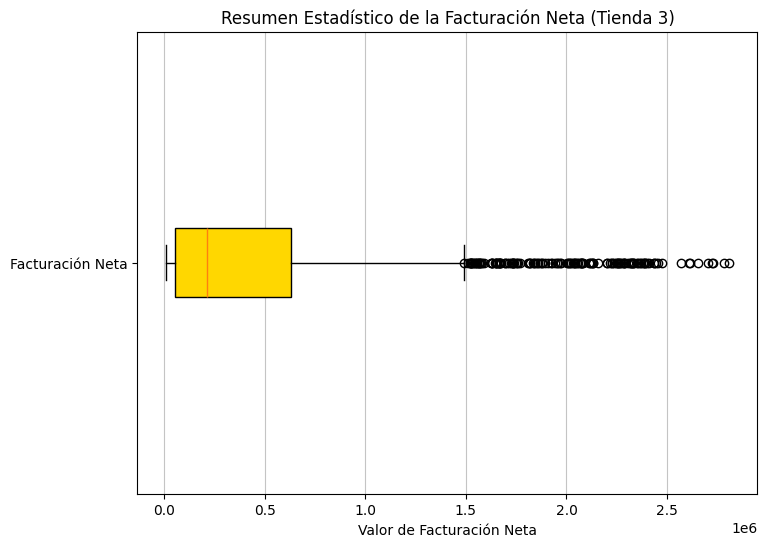

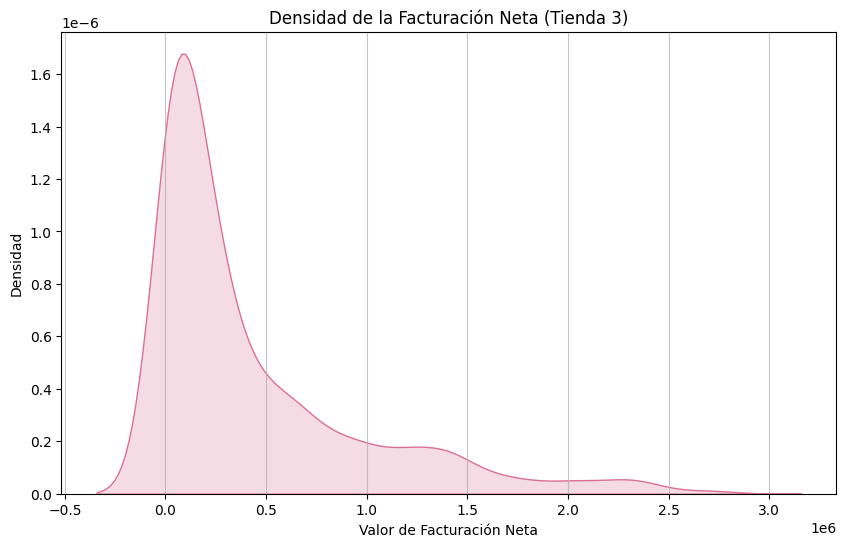

In [ ]:
import urllib.request
import csv
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_3 = crear_lista_desde_csv(url)

if datos_tienda_3:
    facturacion_neta = []
    for fila in datos_tienda_3[1:]: # Omitimos la primera fila (encabezados)
        if len(fila) > 3: # Aseguramos que la fila tenga al menos 4 elementos
            try:
                monto_facturado = float(fila[2].strip())
                costo_envio = float(fila[3].strip())
                factura_neta = monto_facturado - costo_envio
                facturacion_neta.append(factura_neta)
            except ValueError as e:
                print(f"Advertencia: Error al convertir valores en la fila '{fila}'. Se omitirá en el análisis. Error: {e}")
            except IndexError:
                print(f"Advertencia: Fila '{fila}' no tiene suficientes elementos. Se omitirá.")

    if facturacion_neta:
        total_facturacion_neta = sum(facturacion_neta)
        promedio_facturacion_neta = total_facturacion_neta / len(facturacion_neta)
        maxima_facturacion_neta = max(facturacion_neta)
        minima_facturacion_neta = min(facturacion_neta)

        print("\n--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 3 ---")
        print(f"Total de Facturación Neta: ${total_facturacion_neta:.2f}")
        print(f"Promedio de Facturación Neta: ${promedio_facturacion_neta:.2f}")
        print(f"Facturación Neta Máxima: ${maxima_facturacion_neta:.2f}")
        print(f"Facturación Neta Mínima: ${minima_facturacion_neta:.2f}")

        # 1. Histograma de la Distribución de la Facturación Neta
        plt.figure(figsize=(10, 6))
        plt.hist(facturacion_neta, bins=30, color='mediumseagreen', edgecolor='black')
        plt.title('Distribución de la Facturación Neta (Tienda 3)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Frecuencia de Transacciones')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # 2. Gráfico de Caja (Box Plot) para Resumen Estadístico
        plt.figure(figsize=(8, 6))
        plt.boxplot(facturacion_neta, vert=False, patch_artist=True, boxprops={'facecolor': 'gold'})
        plt.title('Resumen Estadístico de la Facturación Neta (Tienda 3)')
        plt.xlabel('Valor de Facturación Neta')
        plt.yticks([1], ['Facturación Neta'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

        # 3. Gráfico de Densidad (KDE) para una Visión Suavizada de la Distribución
        plt.figure(figsize=(10, 6))
        sns.kdeplot(facturacion_neta, fill=True, color='palevioletred')
        plt.title('Densidad de la Facturación Neta (Tienda 3)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Densidad')
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron valores de facturación y/o costos de envío válidos para analizar en la Tienda 3.")
else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 3.")


--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 4 ---
Total de Facturación Neta: $983058300.00
Promedio de Facturación Neta: $416903.44
Facturación Neta Máxima: $2747500.00
Facturación Neta Mínima: $6800.00


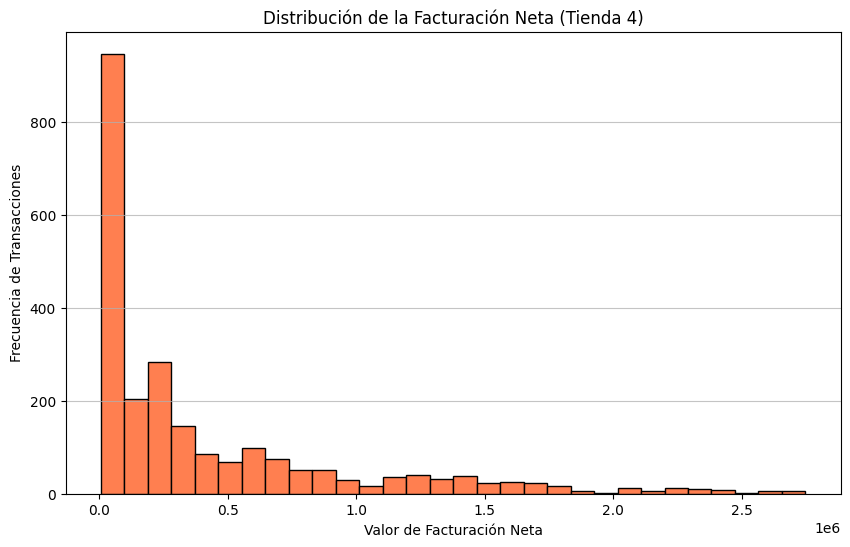

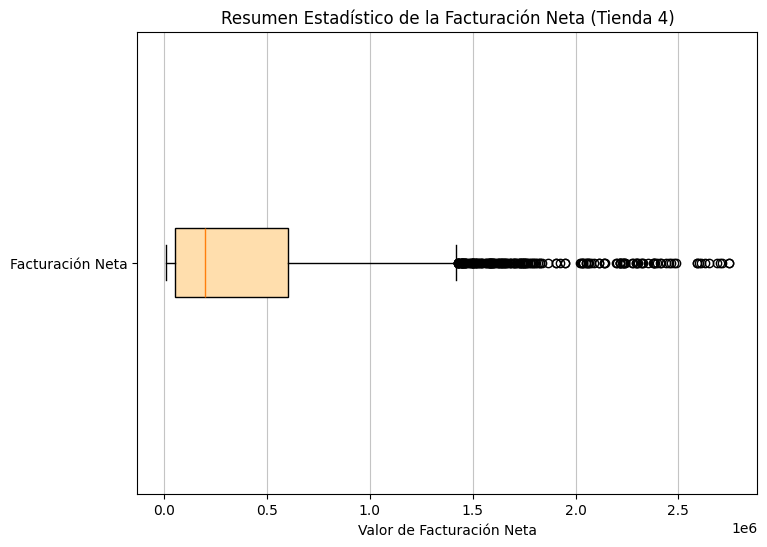

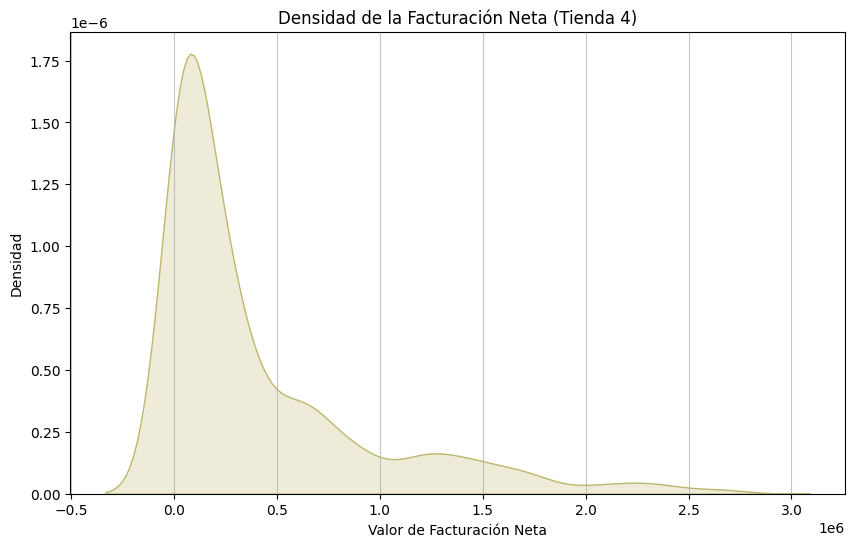

In [ ]:
import urllib.request
import csv
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_4 = crear_lista_desde_csv(url)

if datos_tienda_4:
    facturacion_neta = []
    for fila in datos_tienda_4[1:]: # Omitimos la primera fila (encabezados)
        if len(fila) > 3: # Aseguramos que la fila tenga al menos 4 elementos
            try:
                monto_facturado = float(fila[2].strip())
                costo_envio = float(fila[3].strip())
                factura_neta = monto_facturado - costo_envio
                facturacion_neta.append(factura_neta)
            except ValueError as e:
                print(f"Advertencia: Error al convertir valores en la fila '{fila}'. Se omitirá en el análisis. Error: {e}")
            except IndexError:
                print(f"Advertencia: Fila '{fila}' no tiene suficientes elementos. Se omitirá.")

    if facturacion_neta:
        total_facturacion_neta = sum(facturacion_neta)
        promedio_facturacion_neta = total_facturacion_neta / len(facturacion_neta)
        maxima_facturacion_neta = max(facturacion_neta)
        minima_facturacion_neta = min(facturacion_neta)

        print("\n--- Análisis de Facturación Neta (Monto Facturado - Costo de Envío) - Tienda 4 ---")
        print(f"Total de Facturación Neta: ${total_facturacion_neta:.2f}")
        print(f"Promedio de Facturación Neta: ${promedio_facturacion_neta:.2f}")
        print(f"Facturación Neta Máxima: ${maxima_facturacion_neta:.2f}")
        print(f"Facturación Neta Mínima: ${minima_facturacion_neta:.2f}")

        # 1. Histograma de la Distribución de la Facturación Neta
        plt.figure(figsize=(10, 6))
        plt.hist(facturacion_neta, bins=30, color='coral', edgecolor='black')
        plt.title('Distribución de la Facturación Neta (Tienda 4)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Frecuencia de Transacciones')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # 2. Gráfico de Caja (Box Plot) para Resumen Estadístico
        plt.figure(figsize=(8, 6))
        plt.boxplot(facturacion_neta, vert=False, patch_artist=True, boxprops={'facecolor': 'navajowhite'})
        plt.title('Resumen Estadístico de la Facturación Neta (Tienda 4)')
        plt.xlabel('Valor de Facturación Neta')
        plt.yticks([1], ['Facturación Neta'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

        # 3. Gráfico de Densidad (KDE) para una Visión Suavizada de la Distribución
        plt.figure(figsize=(10, 6))
        sns.kdeplot(facturacion_neta, fill=True, color='darkkhaki')
        plt.title('Densidad de la Facturación Neta (Tienda 4)')
        plt.xlabel('Valor de Facturación Neta')
        plt.ylabel('Densidad')
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron valores de facturación y/o costos de envío válidos para analizar en la Tienda 4.")
else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 4.")

# 2. Ventas por categoría

Se han truncado las últimas 5000 líneas del flujo de salida.
Name: 2027, dtype: object

Línea 2029:
Producto                   Balón de baloncesto
Categoría del Producto    Deportes y diversión
Precio                                 33200.0
Costo de envío                             0.0
Fecha de Compra                     13/03/2023
Vendedor                        Santiago Silva
Lugar de Compra                         Bogotá
Calificación                                 3
Método de pago              Tarjeta de crédito
Cantidad de cuotas                           2
lat                                    4.60971
lon                                  -74.08175
Name: 2028, dtype: object

Línea 2030:
Producto                             Bicicleta
Categoría del Producto    Deportes y diversión
Precio                                726900.0
Costo de envío                         39100.0
Fecha de Compra                     06/08/2022
Vendedor                        Blanca Ramirez
Lugar de Compra

<Figure size 1200x600 with 0 Axes>

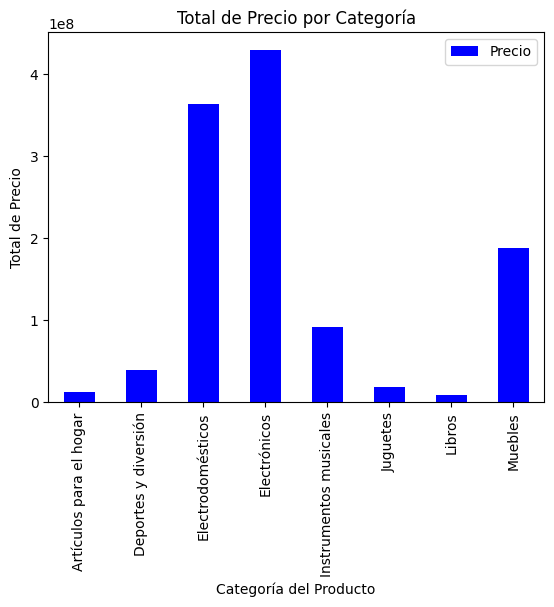

<Figure size 1000x600 with 0 Axes>

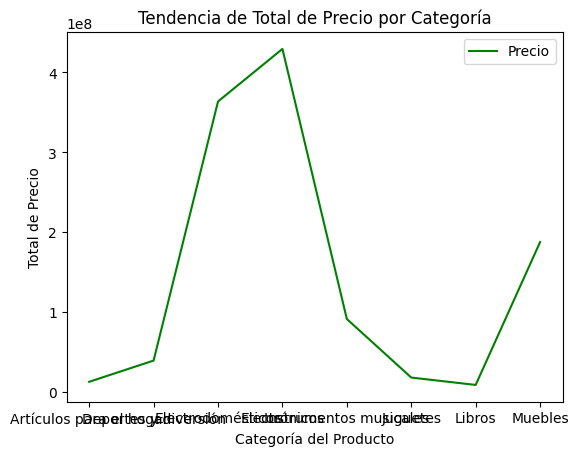

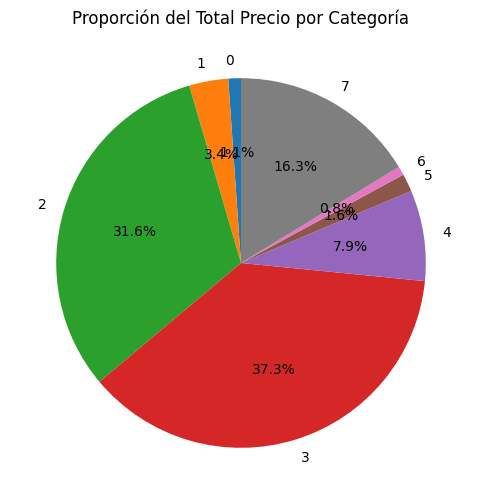

In [ ]:
# Analisis de facturacion por categorias de Tienda 1

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde la URL actualizada
data_url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"

try:
    # Leer el archivo CSV y convertir en DataFrame
    df = pd.read_csv(data_url)

    # Mostrar las primeras filas del dataset
    print("\nPrimeras filas del dataset:")
    for index, row in df.iterrows():
        print(f"\nLínea {index + 1}:")
        print(row)

    # Verificar que la estructura de los datos es correcta
    print("\nEstructura de los datos:")
    print(df.dtypes)  # Imprime el tipo de cada column

    # filtrar solo las columnas de interés: Categoría del Producto, Precio y SKU (Si es necesario)
    relevant_columns = ['Categoría del Producto', 'Precio']
    df_relevant = df[relevant_columns].copy()

    print("\nFirst view of relevant data:")
    print(df_relevant.head())

    # Agrupar los datos por Categoría del Producto y calcular el total de precios
    grouped_data = df_relevant.groupby('Categoría del Producto').sum().reset_index()
    grouped_data.fillna(0, inplace=True)  # Sustituir valores NaN con 0

    print("\nTotal de precios por categoría:")
    print(grouped_data)

    ### Generar gráficos ###

    # Gráfico 1: Barras - Total Precio por Categoría
    plt.figure(figsize=(12, 6))
    grouped_data.plot(kind='bar', x='Categoría del Producto', y='Precio', color='blue')
    plt.title('Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 2: Línea - Trend de Total Precio por Categoría
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='line', x='Categoría del Producto', y='Precio', color='green')
    plt.title('Tendencia de Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 3: Pie - Distribución por Categoría
    plt.figure(figsize=(8, 6))
    grouped_data['Precio'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Proporción del Total Precio por Categoría')
    plt.ylabel('')
    plt.show()

except Exception as e:
    print(f"Error al procesar los datos: {str(e)}")


Se han truncado las últimas 5000 líneas del flujo de salida.
Name: 2027, dtype: object

Línea 2029:
Producto                          Microondas
Categoría del Producto     Electrodomésticos
Precio                              712500.0
Costo de envío                       40300.0
Fecha de Compra                   15/01/2022
Vendedor                       Lucas Olivera
Lugar de Compra                     Medellín
Calificación                               5
Método de pago            Tarjeta de crédito
Cantidad de cuotas                         1
lat                                  6.25184
lon                                -75.56359
Name: 2028, dtype: object

Línea 2030:
Producto                               Mochila
Categoría del Producto    Deportes y diversión
Precio                                102900.0
Costo de envío                          3700.0
Fecha de Compra                     25/03/2020
Vendedor                         Lucas Olivera
Lugar de Compra                        

<Figure size 1200x600 with 0 Axes>

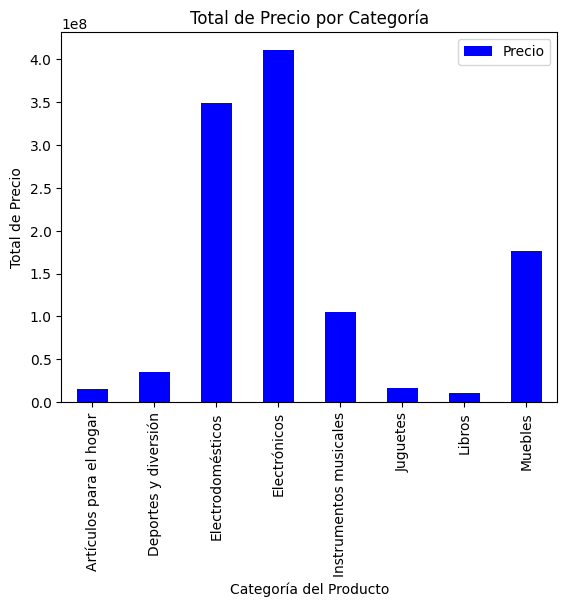

<Figure size 1000x600 with 0 Axes>

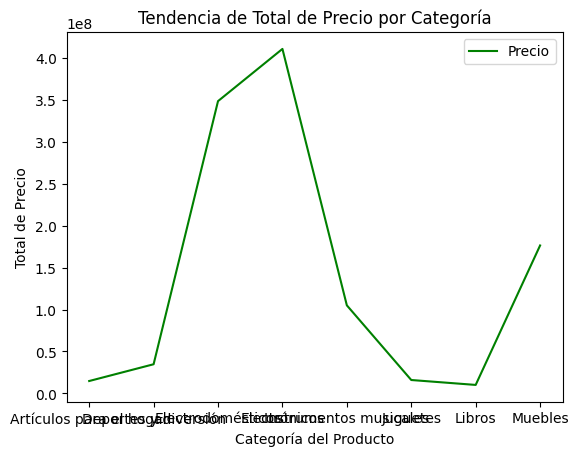

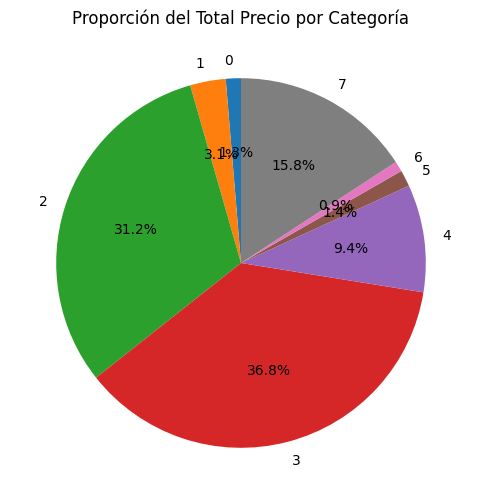

In [ ]:
# Analisis de facturacion por categorias de Tienda 2

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde la URL actualizada
data_url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"

try:
    # Leer el archivo CSV y convertir en DataFrame
    df = pd.read_csv(data_url)

    # Mostrar las primeras filas del dataset
    print("\nPrimeras filas del dataset:")
    for index, row in df.iterrows():
        print(f"\nLínea {index + 1}:")
        print(row)

    # Verificar que la estructura de los datos es correcta
    print("\nEstructura de los datos:")
    print(df.dtypes)  # Imprime el tipo de cada column

    # filtrar solo las columnas de interés: Categoría del Producto, Precio y SKU (Si es necesario)
    relevant_columns = ['Categoría del Producto', 'Precio']
    df_relevant = df[relevant_columns].copy()

    print("\nFirst view of relevant data:")
    print(df_relevant.head())

    # Agrupar los datos por Categoría del Producto y calcular el total de precios
    grouped_data = df_relevant.groupby('Categoría del Producto').sum().reset_index()
    grouped_data.fillna(0, inplace=True)  # Sustituir valores NaN con 0

    print("\nTotal de precios por categoría:")
    print(grouped_data)

    ### Generar gráficos ###

    # Gráfico 1: Barras - Total Precio por Categoría
    plt.figure(figsize=(12, 6))
    grouped_data.plot(kind='bar', x='Categoría del Producto', y='Precio', color='blue')
    plt.title('Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 2: Línea - Trend de Total Precio por Categoría
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='line', x='Categoría del Producto', y='Precio', color='green')
    plt.title('Tendencia de Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 3: Pie - Distribución por Categoría
    plt.figure(figsize=(8, 6))
    grouped_data['Precio'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Proporción del Total Precio por Categoría')
    plt.ylabel('')
    plt.show()

except Exception as e:
    print(f"Error al procesar los datos: {str(e)}")


Se han truncado las últimas 5000 líneas del flujo de salida.
Name: 2027, dtype: object

Línea 2029:
Producto                       Smart TV
Categoría del Producto     Electrónicos
Precio                        1465200.0
Costo de envío                  78200.0
Fecha de Compra              28/05/2020
Vendedor                  Camila Rivera
Lugar de Compra                Medellín
Calificación                          4
Método de pago                    Nequi
Cantidad de cuotas                    1
lat                             6.25184
lon                           -75.56359
Name: 2028, dtype: object

Línea 2030:
Producto                       Mesa de noche
Categoría del Producto               Muebles
Precio                              238100.0
Costo de envío                       13300.0
Fecha de Compra                   09/08/2021
Vendedor                      Blanca Ramirez
Lugar de Compra                 Barranquilla
Calificación                               3
Método de pago       

<Figure size 1200x600 with 0 Axes>

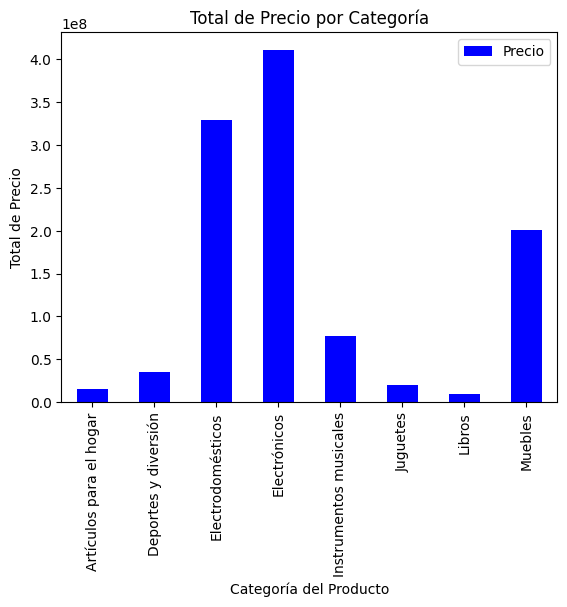

<Figure size 1000x600 with 0 Axes>

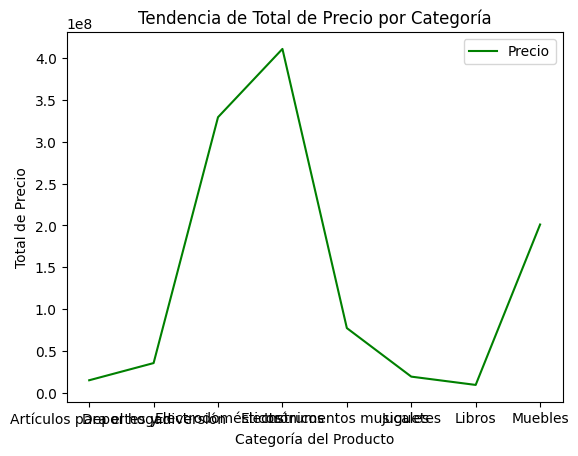

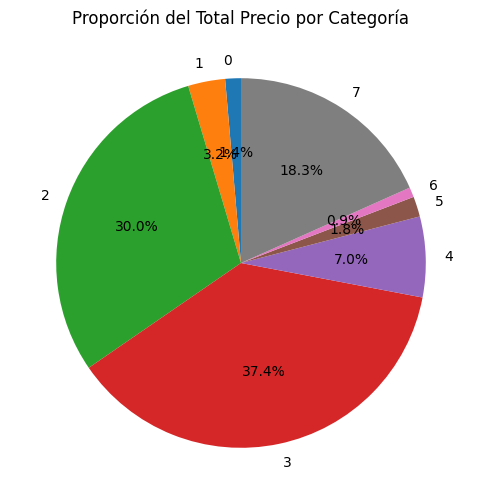

In [ ]:
# Analisis de facturacion por categorias de Tienda 3

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde la URL actualizada
data_url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"

try:
    # Leer el archivo CSV y convertir en DataFrame
    df = pd.read_csv(data_url)

    # Mostrar las primeras filas del dataset
    print("\nPrimeras filas del dataset:")
    for index, row in df.iterrows():
        print(f"\nLínea {index + 1}:")
        print(row)

    # Verificar que la estructura de los datos es correcta
    print("\nEstructura de los datos:")
    print(df.dtypes)  # Imprime el tipo de cada column

    # filtrar solo las columnas de interés: Categoría del Producto, Precio y SKU (Si es necesario)
    relevant_columns = ['Categoría del Producto', 'Precio']
    df_relevant = df[relevant_columns].copy()

    print("\nFirst view of relevant data:")
    print(df_relevant.head())

    # Agrupar los datos por Categoría del Producto y calcular el total de precios
    grouped_data = df_relevant.groupby('Categoría del Producto').sum().reset_index()
    grouped_data.fillna(0, inplace=True)  # Sustituir valores NaN con 0

    print("\nTotal de precios por categoría:")
    print(grouped_data)

    ### Generar gráficos ###

    # Gráfico 1: Barras - Total Precio por Categoría
    plt.figure(figsize=(12, 6))
    grouped_data.plot(kind='bar', x='Categoría del Producto', y='Precio', color='blue')
    plt.title('Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 2: Línea - Trend de Total Precio por Categoría
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='line', x='Categoría del Producto', y='Precio', color='green')
    plt.title('Tendencia de Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 3: Pie - Distribución por Categoría
    plt.figure(figsize=(8, 6))
    grouped_data['Precio'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Proporción del Total Precio por Categoría')
    plt.ylabel('')
    plt.show()

except Exception as e:
    print(f"Error al procesar los datos: {str(e)}")


Se han truncado las últimas 5000 líneas del flujo de salida.
Name: 2026, dtype: object

Línea 2028:
Producto                       Kit de bancas
Categoría del Producto               Muebles
Precio                              303400.0
Costo de envío                       16700.0
Fecha de Compra                   09/03/2020
Vendedor                       Juliana Costa
Lugar de Compra                         Cali
Calificación                               2
Método de pago            Tarjeta de crédito
Cantidad de cuotas                         4
lat                                  3.43722
lon                                 -76.5225
Name: 2027, dtype: object

Línea 2029:
Producto                     Balón de voleibol
Categoría del Producto    Deportes y diversión
Precio                                 58500.0
Costo de envío                          7800.0
Fecha de Compra                     18/03/2020
Vendedor                           Pedro Gomez
Lugar de Compra                        

<Figure size 1200x600 with 0 Axes>

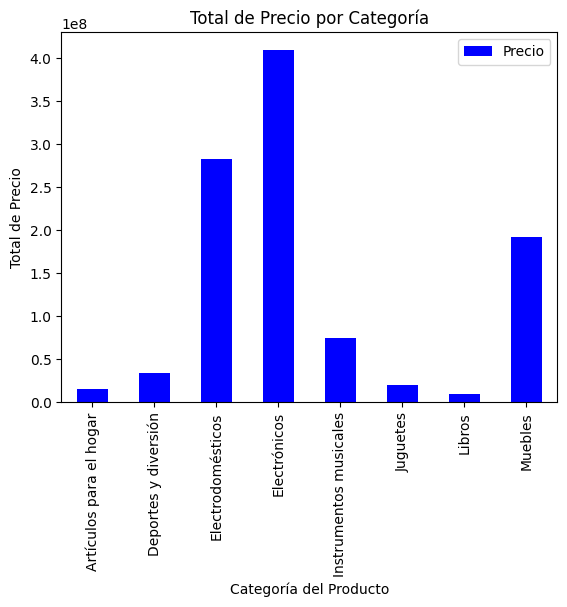

<Figure size 1000x600 with 0 Axes>

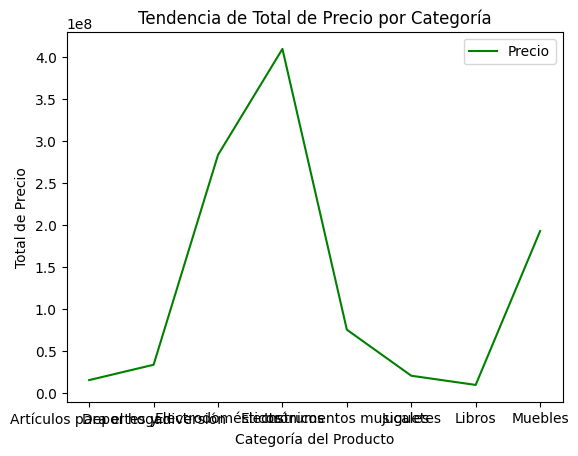

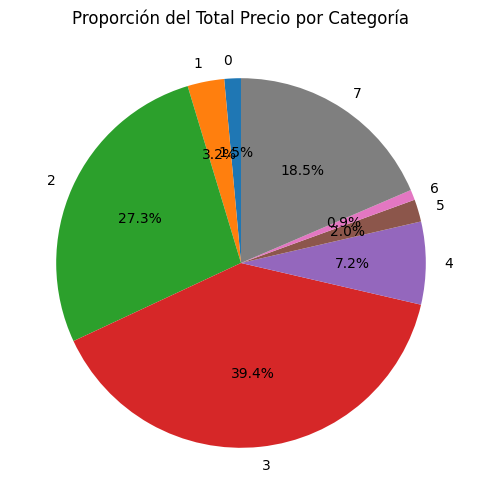

In [ ]:
# Analisis de facturacion por categorias de Tienda 4

import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV desde la URL actualizada
data_url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

try:
    # Leer el archivo CSV y convertir en DataFrame
    df = pd.read_csv(data_url)

    # Mostrar las primeras filas del dataset
    print("\nPrimeras filas del dataset:")
    for index, row in df.iterrows():
        print(f"\nLínea {index + 1}:")
        print(row)

    # Verificar que la estructura de los datos es correcta
    print("\nEstructura de los datos:")
    print(df.dtypes)  # Imprime el tipo de cada column

    # filtrar solo las columnas de interés: Categoría del Producto, Precio y SKU (Si es necesario)
    relevant_columns = ['Categoría del Producto', 'Precio']
    df_relevant = df[relevant_columns].copy()

    print("\nFirst view of relevant data:")
    print(df_relevant.head())

    # Agrupar los datos por Categoría del Producto y calcular el total de precios
    grouped_data = df_relevant.groupby('Categoría del Producto').sum().reset_index()
    grouped_data.fillna(0, inplace=True)  # Sustituir valores NaN con 0

    print("\nTotal de precios por categoría:")
    print(grouped_data)

    ### Generar gráficos ###

    # Gráfico 1: Barras - Total Precio por Categoría
    plt.figure(figsize=(12, 6))
    grouped_data.plot(kind='bar', x='Categoría del Producto', y='Precio', color='blue')
    plt.title('Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 2: Línea - Trend de Total Precio por Categoría
    plt.figure(figsize=(10, 6))
    grouped_data.plot(kind='line', x='Categoría del Producto', y='Precio', color='green')
    plt.title('Tendencia de Total de Precio por Categoría')
    plt.xlabel('Categoría del Producto')
    plt.ylabel('Total de Precio')
    plt.show()

    # Gráfico 3: Pie - Distribución por Categoría
    plt.figure(figsize=(8, 6))
    grouped_data['Precio'].plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Proporción del Total Precio por Categoría')
    plt.ylabel('')
    plt.show()

except Exception as e:
    print(f"Error al procesar los datos: {str(e)}")


# 3. Calificación promedio de la tienda



--- Análisis de Calificación Promedio (Tienda 1) ---
Promedio de Calificación: 3.98
Mediana de Calificación: 5.00
Calificación Mínima: 1.00
Calificación Máxima: 5.00


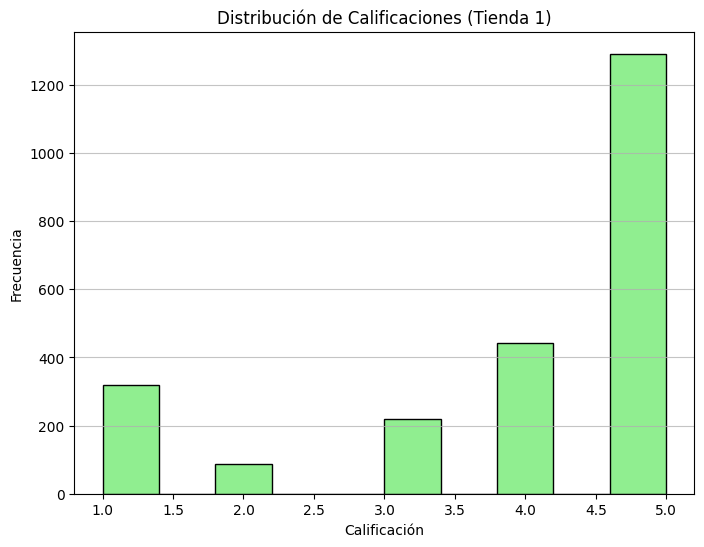

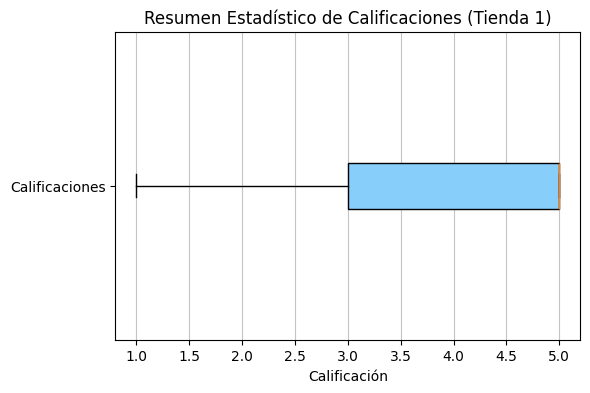

In [ ]:
import urllib.request
import csv
import io
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_1 = crear_lista_desde_csv(url)

if datos_tienda_1:
    calificaciones = []
    for i, fila in enumerate(datos_tienda_1):
        if i > 0 and len(fila) > 7:  # Omitir encabezado y asegurar que haya al menos 8 elementos
            calificacion_str = fila[7].strip()
            try:
                calificacion = float(calificacion_str)
                calificaciones.append(calificacion)
            except ValueError:
                print(f"Advertencia: No se pudo convertir a número la calificación '{calificacion_str}' en la fila {i+1}. Se omitirá.")
        elif i > 0 and len(fila) <= 7:
            print(f"Advertencia: La fila {i+1} no tiene suficientes elementos para obtener la calificación.")

    if calificaciones:
        promedio_calificacion = np.mean(calificaciones)
        mediana_calificacion = np.median(calificaciones)
        minima_calificacion = np.min(calificaciones)
        maxima_calificacion = np.max(calificaciones)

        print("\n--- Análisis de Calificación Promedio (Tienda 1) ---")
        print(f"Promedio de Calificación: {promedio_calificacion:.2f}")
        print(f"Mediana de Calificación: {mediana_calificacion:.2f}")
        print(f"Calificación Mínima: {minima_calificacion:.2f}")
        print(f"Calificación Máxima: {maxima_calificacion:.2f}")

        # Visualización de la distribución de calificaciones
        plt.figure(figsize=(8, 6))
        plt.hist(calificaciones, bins=10, color='lightgreen', edgecolor='black')
        plt.title('Distribución de Calificaciones (Tienda 1)')
        plt.xlabel('Calificación')
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Gráfico de caja para visualizar el resumen estadístico
        plt.figure(figsize=(6, 4))
        plt.boxplot(calificaciones, vert=False, patch_artist=True, boxprops={'facecolor': 'lightskyblue'})
        plt.title('Resumen Estadístico de Calificaciones (Tienda 1)')
        plt.xlabel('Calificación')
        plt.yticks([1], ['Calificaciones'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron calificaciones válidas para analizar.")

else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 1.")


--- Análisis de Calificación Promedio (Tienda 2) ---
Promedio de Calificación: 4.04
Mediana de Calificación: 5.00
Calificación Mínima: 1.00
Calificación Máxima: 5.00


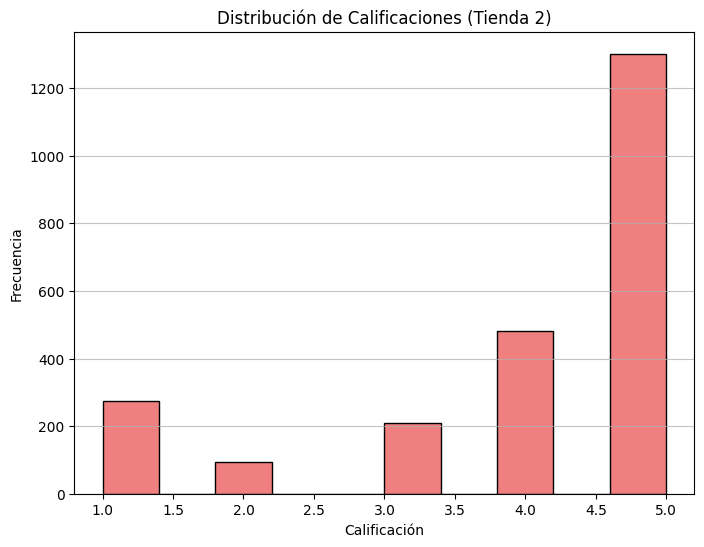

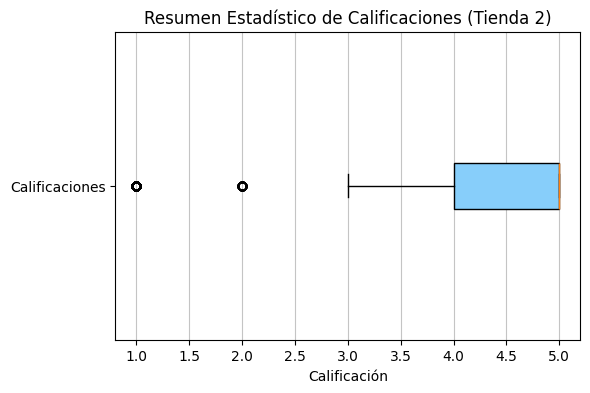

In [ ]:
import urllib.request
import csv
import io
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_2 = crear_lista_desde_csv(url)

if datos_tienda_2:
    calificaciones = []
    for i, fila in enumerate(datos_tienda_2):
        if i > 0 and len(fila) > 7:  # Omitir encabezado y asegurar que haya al menos 8 elementos
            calificacion_str = fila[7].strip()
            try:
                calificacion = float(calificacion_str)
                calificaciones.append(calificacion)
            except ValueError:
                print(f"Advertencia: No se pudo convertir a número la calificación '{calificacion_str}' en la fila {i+1}. Se omitirá.")
        elif i > 0 and len(fila) <= 7:
            print(f"Advertencia: La fila {i+1} no tiene suficientes elementos para obtener la calificación.")

    if calificaciones:
        promedio_calificacion = np.mean(calificaciones)
        mediana_calificacion = np.median(calificaciones)
        minima_calificacion = np.min(calificaciones)
        maxima_calificacion = np.max(calificaciones)

        print("\n--- Análisis de Calificación Promedio (Tienda 2) ---")
        print(f"Promedio de Calificación: {promedio_calificacion:.2f}")
        print(f"Mediana de Calificación: {mediana_calificacion:.2f}")
        print(f"Calificación Mínima: {minima_calificacion:.2f}")
        print(f"Calificación Máxima: {maxima_calificacion:.2f}")

        # Visualización de la distribución de calificaciones
        plt.figure(figsize=(8, 6))
        plt.hist(calificaciones, bins=10, color='lightcoral', edgecolor='black')
        plt.title('Distribución de Calificaciones (Tienda 2)')
        plt.xlabel('Calificación')
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Gráfico de caja para visualizar el resumen estadístico
        plt.figure(figsize=(6, 4))
        plt.boxplot(calificaciones, vert=False, patch_artist=True, boxprops={'facecolor': 'lightskyblue'})
        plt.title('Resumen Estadístico de Calificaciones (Tienda 2)')
        plt.xlabel('Calificación')
        plt.yticks([1], ['Calificaciones'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron calificaciones válidas para analizar.")

else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 2.")


--- Análisis de Calificación Promedio (Tienda 3) ---
Promedio de Calificación: 4.05
Mediana de Calificación: 5.00
Calificación Mínima: 1.00
Calificación Máxima: 5.00


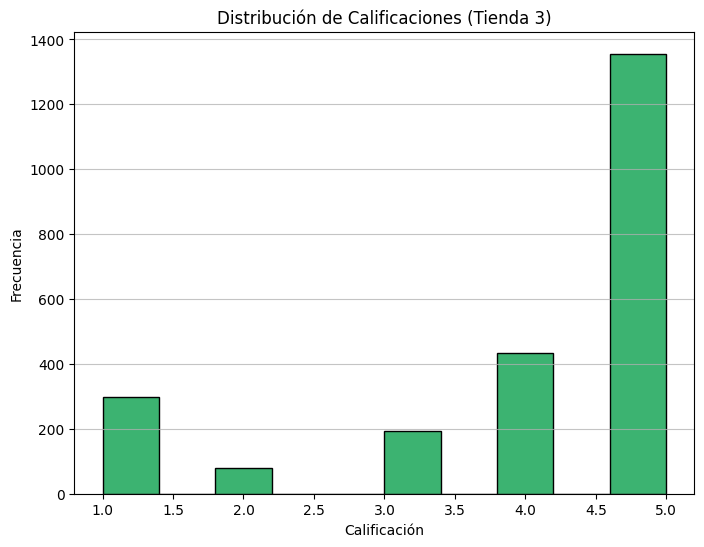

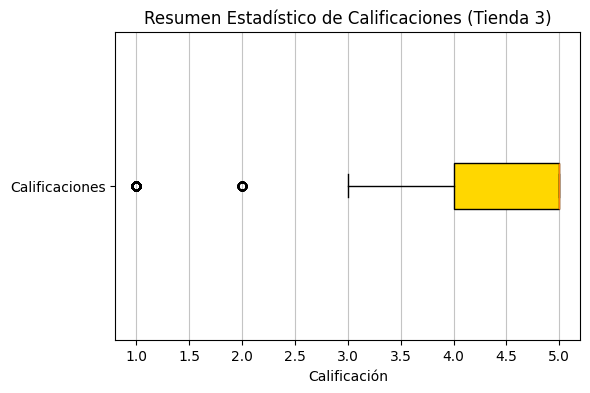

In [ ]:
import urllib.request
import csv
import io
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_3 = crear_lista_desde_csv(url)

if datos_tienda_3:
    calificaciones = []
    for i, fila in enumerate(datos_tienda_3):
        if i > 0 and len(fila) > 7:  # Omitir encabezado y asegurar que haya al menos 8 elementos
            calificacion_str = fila[7].strip()
            try:
                calificacion = float(calificacion_str)
                calificaciones.append(calificacion)
            except ValueError:
                print(f"Advertencia: No se pudo convertir a número la calificación '{calificacion_str}' en la fila {i+1}. Se omitirá.")
        elif i > 0 and len(fila) <= 7:
            print(f"Advertencia: La fila {i+1} no tiene suficientes elementos para obtener la calificación.")

    if calificaciones:
        promedio_calificacion = np.mean(calificaciones)
        mediana_calificacion = np.median(calificaciones)
        minima_calificacion = np.min(calificaciones)
        maxima_calificacion = np.max(calificaciones)

        print("\n--- Análisis de Calificación Promedio (Tienda 3) ---")
        print(f"Promedio de Calificación: {promedio_calificacion:.2f}")
        print(f"Mediana de Calificación: {mediana_calificacion:.2f}")
        print(f"Calificación Mínima: {minima_calificacion:.2f}")
        print(f"Calificación Máxima: {maxima_calificacion:.2f}")

        # Visualización de la distribución de calificaciones
        plt.figure(figsize=(8, 6))
        plt.hist(calificaciones, bins=10, color='mediumseagreen', edgecolor='black')
        plt.title('Distribución de Calificaciones (Tienda 3)')
        plt.xlabel('Calificación')
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Gráfico de caja para visualizar el resumen estadístico
        plt.figure(figsize=(6, 4))
        plt.boxplot(calificaciones, vert=False, patch_artist=True, boxprops={'facecolor': 'gold'})
        plt.title('Resumen Estadístico de Calificaciones (Tienda 3)')
        plt.xlabel('Calificación')
        plt.yticks([1], ['Calificaciones'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron calificaciones válidas para analizar.")

else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 3.")


--- Análisis de Calificación Promedio (Tienda 4) ---
Promedio de Calificación: 4.00
Mediana de Calificación: 5.00
Calificación Mínima: 1.00
Calificación Máxima: 5.00


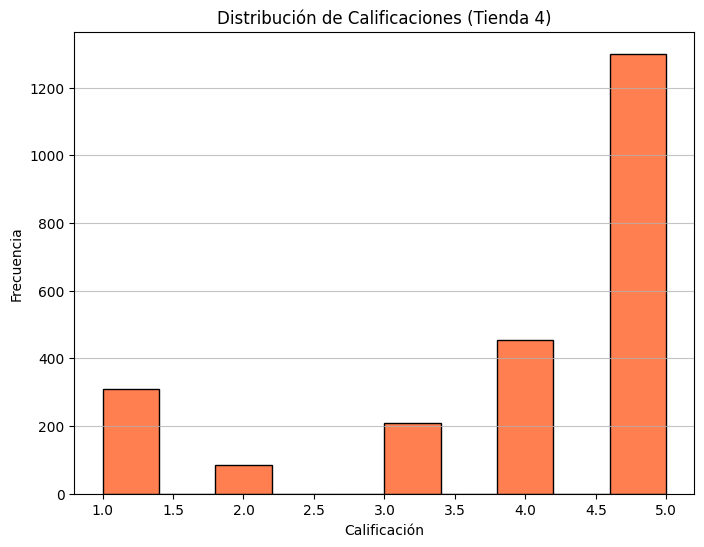

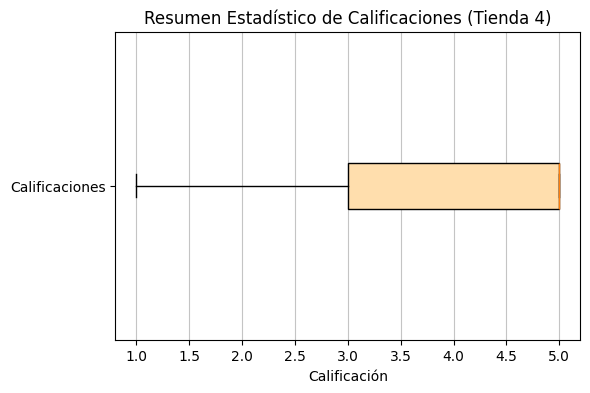

In [ ]:
import urllib.request
import csv
import io
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

def crear_lista_desde_csv(url):
    try:
        with urllib.request.urlopen(url) as response:
            csvfile = io.TextIOWrapper(response, encoding='utf-8')
            reader = csv.reader(csvfile)
            lista_de_listas = list(reader)
            return lista_de_listas
    except urllib.error.URLError as e:
        print(f"Error al acceder a la URL: {e}")
        return None

datos_tienda_4 = crear_lista_desde_csv(url)

if datos_tienda_4:
    calificaciones = []
    for i, fila in enumerate(datos_tienda_4):
        if i > 0 and len(fila) > 7:  # Omitir encabezado y asegurar que haya al menos 8 elementos
            calificacion_str = fila[7].strip()
            try:
                calificacion = float(calificacion_str)
                calificaciones.append(calificacion)
            except ValueError:
                print(f"Advertencia: No se pudo convertir a número la calificación '{calificacion_str}' en la fila {i+1}. Se omitirá.")
        elif i > 0 and len(fila) <= 7:
            print(f"Advertencia: La fila {i+1} no tiene suficientes elementos para obtener la calificación.")

    if calificaciones:
        promedio_calificacion = np.mean(calificaciones)
        mediana_calificacion = np.median(calificaciones)
        minima_calificacion = np.min(calificaciones)
        maxima_calificacion = np.max(calificaciones)

        print("\n--- Análisis de Calificación Promedio (Tienda 4) ---")
        print(f"Promedio de Calificación: {promedio_calificacion:.2f}")
        print(f"Mediana de Calificación: {mediana_calificacion:.2f}")
        print(f"Calificación Mínima: {minima_calificacion:.2f}")
        print(f"Calificación Máxima: {maxima_calificacion:.2f}")

        # Visualización de la distribución de calificaciones
        plt.figure(figsize=(8, 6))
        plt.hist(calificaciones, bins=10, color='coral', edgecolor='black')
        plt.title('Distribución de Calificaciones (Tienda 4)')
        plt.xlabel('Calificación')
        plt.ylabel('Frecuencia')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        # Gráfico de caja para visualizar el resumen estadístico
        plt.figure(figsize=(6, 4))
        plt.boxplot(calificaciones, vert=False, patch_artist=True, boxprops={'facecolor': 'navajowhite'})
        plt.title('Resumen Estadístico de Calificaciones (Tienda 4)')
        plt.xlabel('Calificación')
        plt.yticks([1], ['Calificaciones'])
        plt.grid(axis='x', alpha=0.75)
        plt.show()

    else:
        print("No se encontraron calificaciones válidas para analizar.")

else:
    print("No se pudieron obtener los datos del archivo CSV de la Tienda 4.")

# 4. Productos más y menos vendidos

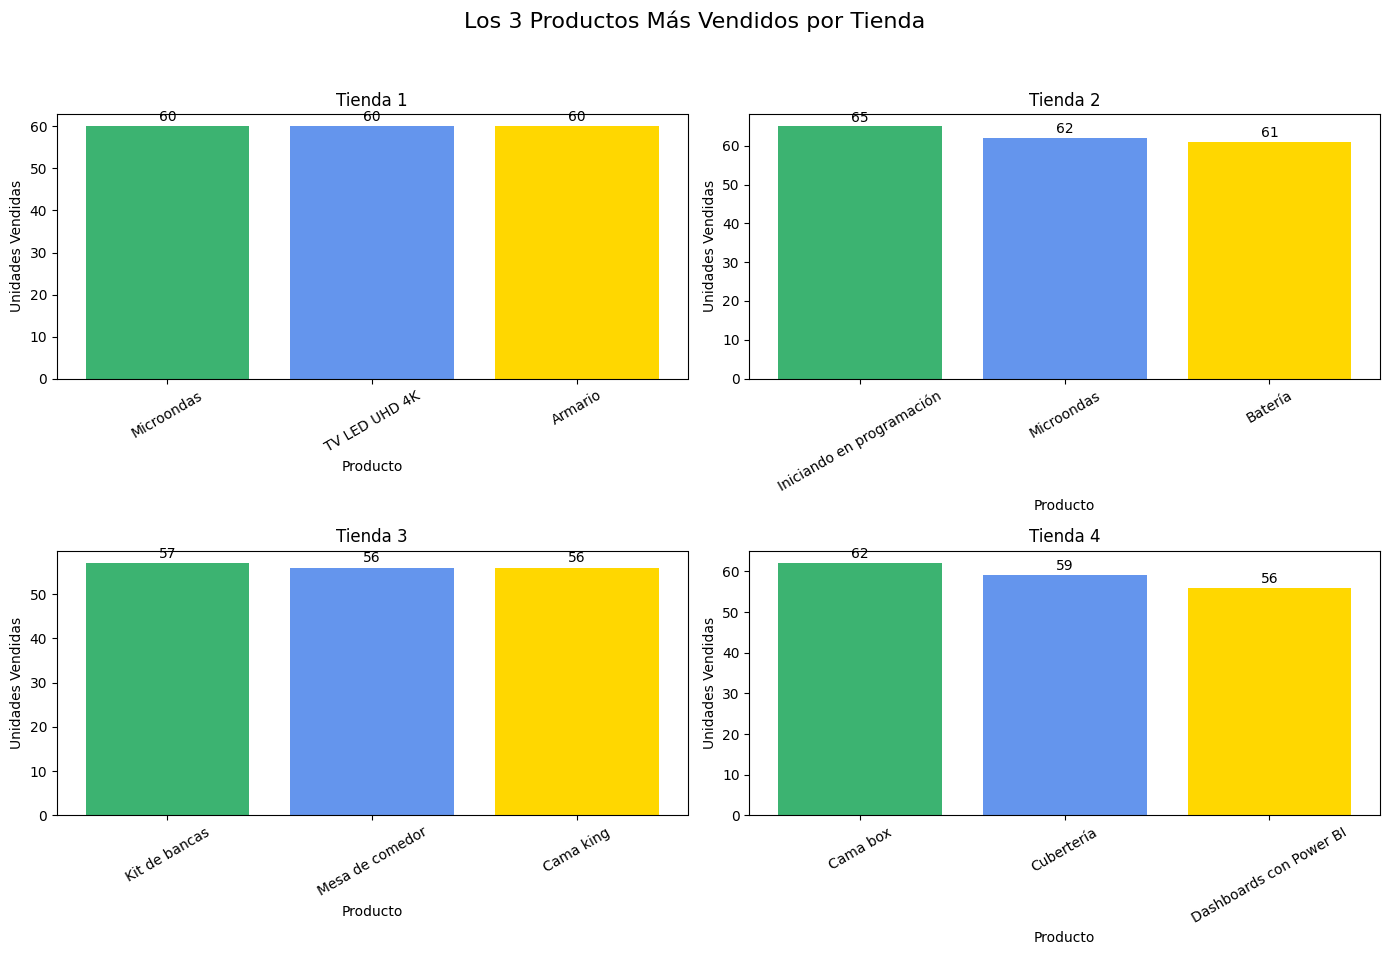

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for the store data
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Dictionary to store dataframes and then the most sold products
store_urls = {
    "Tienda 1": url_tienda1,
    "Tienda 2": url_tienda2,
    "Tienda 3": url_tienda3,
    "Tienda 4": url_tienda4,
}

most_sold_products_by_store = {}

# --- Data Processing ---
for store_name, url in store_urls.items():
    try:
        df = pd.read_csv(url)

        # Determine the product column name
        product_column = None
        if 'Producto' in df.columns:
            product_column = 'Producto'
        elif 'nombre_producto' in df.columns:
            product_column = 'nombre_producto'
        elif 'product_name' in df.columns:
            product_column = 'product_name'
        else:
            print(f"Could not find a common product column in {store_name}. Skipping.")
            continue

        # Count occurrences of each product (most frequent will be at the top)
        product_counts = df[product_column].value_counts()

        # Get the 3 most sold products
        # Use .head() as value_counts sorts in descending order by default
        n_products = min(3, len(product_counts))
        most_sold = product_counts.head(n_products)

        most_sold_products_by_store[store_name] = most_sold.to_dict()

    except Exception as e:
        print(f"Error processing {store_name} from {url}: {e}")

# --- Visualization ---
if not most_sold_products_by_store:
    print("No data to visualize. Please check the URLs and product column names.")
else:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.flatten()
    fig.suptitle('Los 3 Productos Más Vendidos por Tienda', fontsize=16)

    for i, (store_name, products) in enumerate(most_sold_products_by_store.items()):
        if not products: # Handle case where a store might have no data processed
            axes[i].set_title(f"{store_name} (No data)")
            axes[i].axis('off') # Turn off axis for empty plots
            continue

        product_names = list(products.keys())
        sales_counts = list(products.values())

        # Create bar chart
        bars = axes[i].bar(product_names, sales_counts, color=['mediumseagreen', 'cornflowerblue', 'gold'])
        axes[i].set_title(store_name)
        axes[i].set_ylabel('Unidades Vendidas')
        axes[i].set_xlabel('Producto')
        axes[i].tick_params(axis='x', rotation=30) # Rotate x-axis labels

        # Add the sales count on top of each bar
        for bar in bars:
            yval = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

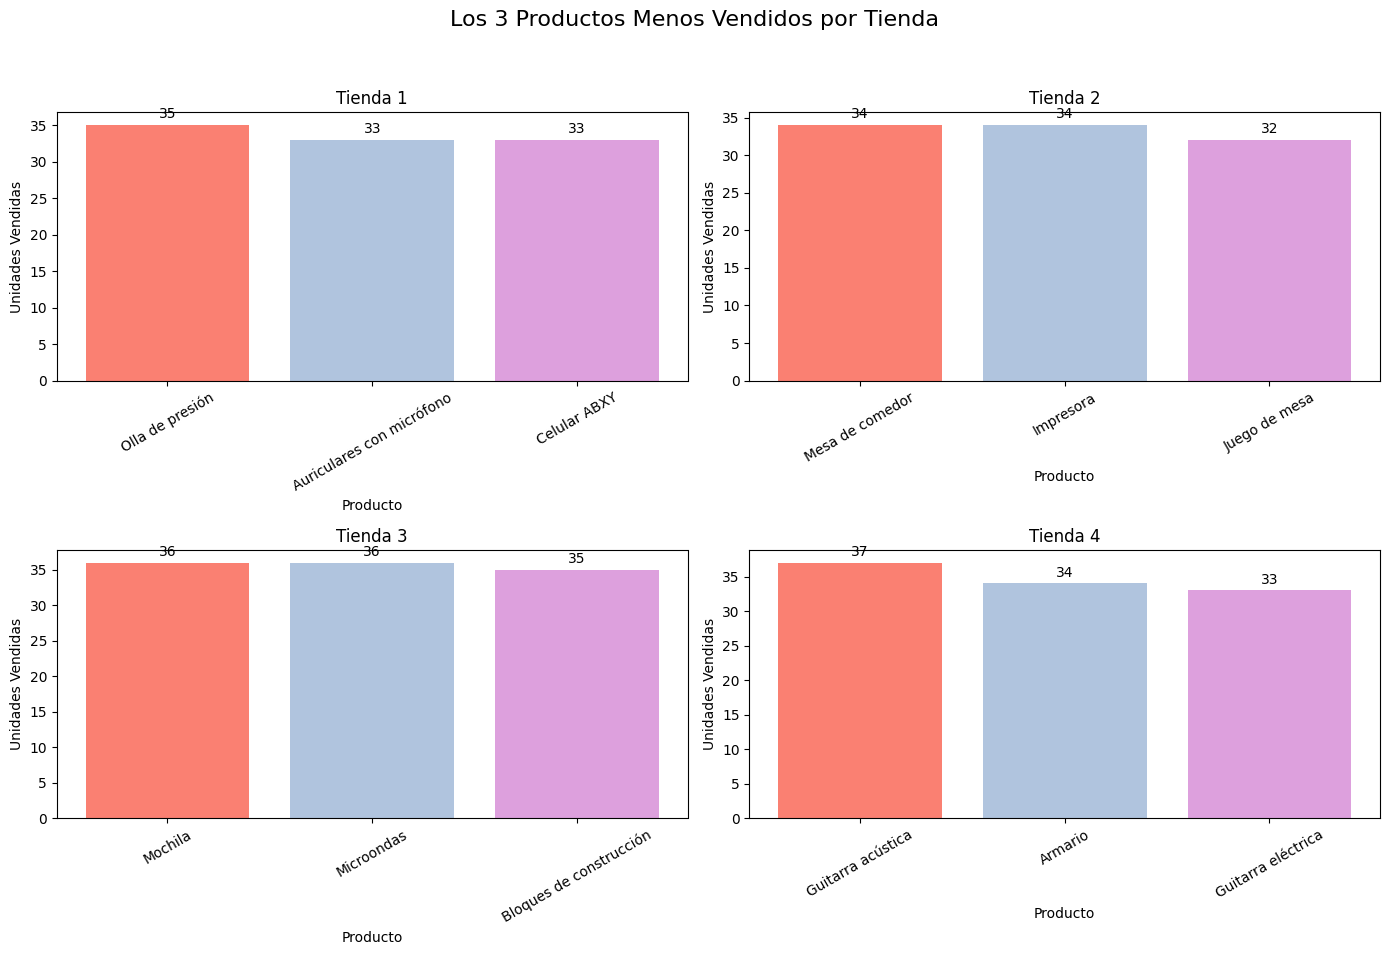

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for the store data
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Dictionary to store dataframes and then the least sold products
store_urls = {
    "Tienda 1": url_tienda1,
    "Tienda 2": url_tienda2,
    "Tienda 3": url_tienda3,
    "Tienda 4": url_tienda4,
}

least_sold_products_by_store = {}

# --- Data Processing ---
for store_name, url in store_urls.items():
    try:
        df = pd.read_csv(url)

        # Assuming the product names are in a column named 'Producto' or similar
        # Let's check the column names to be sure
        # print(f"Column names for {store_name}: {df.columns.tolist()}")

        # Based on typical e-commerce data, 'Producto' or 'nombre_producto' is common.
        # If the column name is different, you'll need to adjust 'Producto' below.
        if 'Producto' in df.columns:
            product_column = 'Producto'
        elif 'nombre_producto' in df.columns: # Sometimes it's this
            product_column = 'nombre_producto'
        elif 'product_name' in df.columns: # Or this
            product_column = 'product_name'
        else:
            print(f"Could not find a common product column in {store_name}. Skipping.")
            continue


        # Count occurrences of each product
        product_counts = df[product_column].value_counts()

        # Get the 3 least sold products
        # We need to consider cases where there are fewer than 3 unique products
        n_products = min(3, len(product_counts))
        least_sold = product_counts.tail(n_products)

        least_sold_products_by_store[store_name] = least_sold.to_dict()

    except Exception as e:
        print(f"Error processing {store_name} from {url}: {e}")

# --- Visualization ---
if not least_sold_products_by_store:
    print("No data to visualize. Please check the URLs and product column names.")
else:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
    axes = axes.flatten()
    fig.suptitle('Los 3 Productos Menos Vendidos por Tienda', fontsize=16)

    for i, (store_name, products) in enumerate(least_sold_products_by_store.items()):
        if not products: # Handle case where a store might have no data processed
            axes[i].set_title(f"{store_name} (No data)")
            axes[i].axis('off') # Turn off axis for empty plots
            continue

        product_names = list(products.keys())
        sales_counts = list(products.values())

        # Create bar chart
        bars = axes[i].bar(product_names, sales_counts, color=['salmon', 'lightsteelblue', 'plum'])
        axes[i].set_title(store_name)
        axes[i].set_ylabel('Unidades Vendidas')
        axes[i].set_xlabel('Producto')
        axes[i].tick_params(axis='x', rotation=30) # Rotate x-axis labels

        # Add the sales count on top of each bar
        for bar in bars:
            yval = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# 5. Envío promedio por tienda

--- Calculando Costo de Envío Promedio ---
'Tienda 1': Costo de Envío Promedio = $26018.61
'Tienda 2': Costo de Envío Promedio = $25216.24
'Tienda 3': Costo de Envío Promedio = $24805.68
'Tienda 4': Costo de Envío Promedio = $23459.46

--- Resultados Finales ---
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


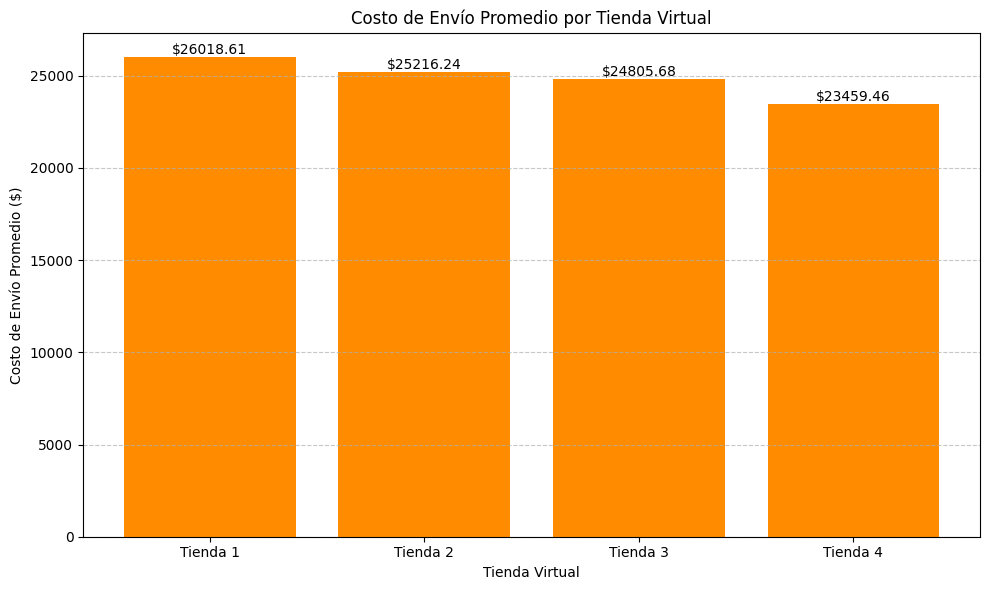

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for the store data
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Dictionary to map store names to their URLs
store_urls = {
    "Tienda 1": url_tienda1,
    "Tienda 2": url_tienda2,
    "Tienda 3": url_tienda3,
    "Tienda 4": url_tienda4,
}

average_shipping_costs = {}
# CORRECTED: Use the exact column name as shown in your output
shipping_column_name = 'Costo de envío'

# --- Data Processing ---
print("--- Calculando Costo de Envío Promedio ---")
for store_name, url in store_urls.items():
    try:
        df = pd.read_csv(url)

        # Check if the specified 'Costo de envío' column exists
        if shipping_column_name in df.columns:
            # Convert the column to numeric, coercing errors to NaN
            df[shipping_column_name] = pd.to_numeric(df[shipping_column_name], errors='coerce')

            # Calculate the average, dropping NaN values
            avg_cost = df[shipping_column_name].mean()

            if pd.isna(avg_cost):
                print(f"'{store_name}': No se pudo calcular el costo de envío promedio (posiblemente no hay datos numéricos en '{shipping_column_name}').")
            else:
                average_shipping_costs[store_name] = avg_cost
                print(f"'{store_name}': Costo de Envío Promedio = ${avg_cost:.2f}")
        else:
            # This 'else' block should ideally not be hit with the corrected column name,
            # but it's good for robust error checking.
            print(f"Advertencia: La columna '{shipping_column_name}' no se encontró en '{store_name}'. Columnas disponibles: {df.columns.tolist()}")
            average_shipping_costs[store_name] = np.nan # Assign NaN if column not found

    except Exception as e:
        print(f"Error al procesar '{store_name}' desde {url}: {e}")
        average_shipping_costs[store_name] = np.nan # Assign NaN on error

print("\n--- Resultados Finales ---")
for store, cost in average_shipping_costs.items():
    if not pd.isna(cost):
        print(f"{store}: ${cost:.2f}")
    else:
        print(f"{store}: No disponible")

# --- Visualización del Costo de Envío Promedio ---
# Let's visualize these average shipping costs to easily compare them across the stores.

# Filter out stores where average shipping cost couldn't be calculated
plot_data = {k: v for k, v in average_shipping_costs.items() if not pd.isna(v)}

if not plot_data:
    print("\nNo hay datos suficientes para generar el gráfico de costos de envío.")
else:
    store_names = list(plot_data.keys())
    avg_costs = list(plot_data.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar(store_names, avg_costs, color='darkorange')
    plt.xlabel('Tienda Virtual')
    plt.ylabel('Costo de Envío Promedio ($)')
    plt.title('Costo de Envío Promedio por Tienda Virtual')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add the average cost on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'${yval:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()